In [1]:
import sys
import os
sys.path.append("..")
from diachr.diachromatic_interaction_set import DiachromaticInteractionSet
from diachr.diachromatic_interaction import DiachromaticInteraction

## Implement `CHCTadViz`

`CHCTadViz` is implemented here:

In [2]:
from diachr.CHCTadViz import CHCTadViz

Once the data has been loaded and grouped, any region can be visualized in a reasonable amount of time.

## Basics of usage

For demonstration purposes, we have prepared an interaction file with 44 interactions and a BED file with five TAD regions. A class `CHCTadViz` obejct is created by passing these two files to the constructor.

In [3]:
INTERACTION_FILE = '/Users/hansep/PycharmProjects/diachrscripts/tests/data/CHCTadViz_i_test_file.tsv'
TAD_BED_FILE = '/Users/hansep/PycharmProjects/diachrscripts/tests/data/CHCTadViz_t_test_file.bed'
visualizer = CHCTadViz(i_file=INTERACTION_FILE, t_file=TAD_BED_FILE, verbose=True)

[INFO] Initializing DirectedTadVisualizer object ...
	[INFO] Reading interactions and group them by chromosomes ...
		chr10: 44 interactions
	[INFO] ... done.
	[INFO] Reading TAD regions and group them by chromosomes ...
		chr10: 5 TADs
	[INFO] ... done.
[INFO] ... done.


The function `CHCTadViz.create_visualization()` can be used to visualize specific region. The only parameters that are required are the genomic coordinates. Before a visualization, is created, the following steps are carried out:

1. First, all interactions that are located completely within the region to be visualized are extracted.

2. These interactions can be filtered by interaction category, enrichment status and HT tag. By default, the interactions are not filtered.

3. For the remaining interactions, the quantiles `0.1` to `1.0` are determined. These are used to represent interactions depending on their total read pair counts. For instance, in this example, all interactions with a read pair count smaller or equal `5` will be shown with a transparency of `0.1`.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DIX', 'DI', 'UIR', 'UI']
		[INFO] Enrichment status:
			['NE', 'EN', 'EE', 'NN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			44
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 5.3  9.6 11.9 14.  16.  18.  20.  22.4 26.7 30. ]
[INFO] ... done.


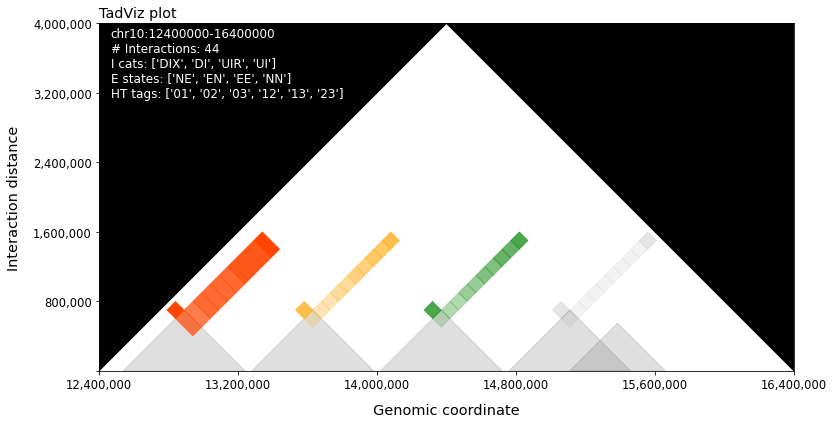

In [4]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end)

In priciple, this plot corresponds to a typical represenation of Hi-C interactions. The genomic coordinates are plotted on the x-axis and each colored tetragon in the triangle above represents an interaction between two genomic regions. For Hi-C data, the interactions are typically grouped in bins of the same size, so that all tetragon are squares.

For this plot, the tetragons can also be rectangular. Interactions from different categories are shown in different colors (`DIX` in `orangered`, `DI` in `orange`, `UIR` in `green` and `UI` in `gray`). For this example, we have assigned the read pair numbers of interactions in a linearly decreasing manner. `DIX` interactions have between `21` and `30` read pairs per interaction, both `DI` and `UIR` interactions between `20` and `11` and `UI` interactions between `1` and `10`.

The TAD regions are shown as gray triangles that have a certain degree of transparency. In cases where TAD regions for different celltypes are loaded, TAD regions can also overlap. Due to the transparency, regions covered by multiple TADs appear as darker triangles.

The interaction within the region to be visualized can be filtered. For instance, the folowing plot only contains `DI` and `UIR` interactions for which the left digest was selected for enrichment (`EN`).

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			20
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[11.9 12.8 13.7 14.6 15.5 16.4 17.3 18.2 19.1 20. ]
[INFO] ... done.


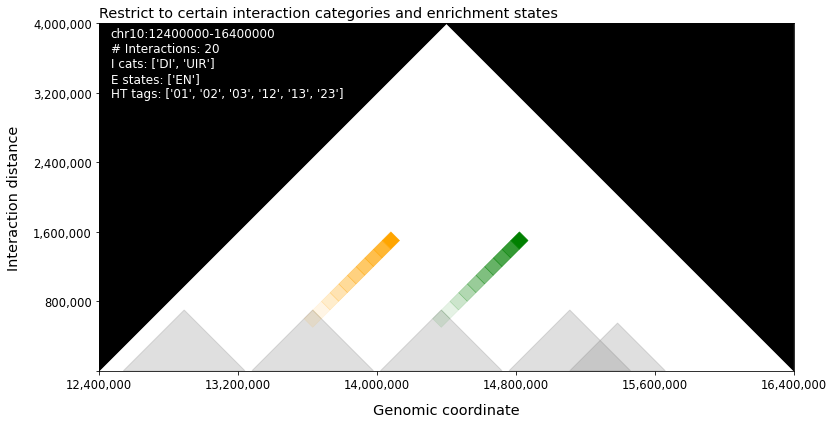

In [5]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI','UIR'],
                                enr_cat_list = ['EN'],
                                plot_title = 'Restrict to certain interaction categories and enrichment states')

Previously, the interactions are assigned colors according to their category. In the following plot, the interactions are colored according to their HT tags. The colors are assigned as follows:

```
'01': 'pink',
'02': 'red',
'03': 'lime',
'12': 'magenta',
'13': 'blue',
'23': 'turquoise'
```

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			20
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[11.9 12.8 13.7 14.6 15.5 16.4 17.3 18.2 19.1 20. ]
[INFO] ... done.


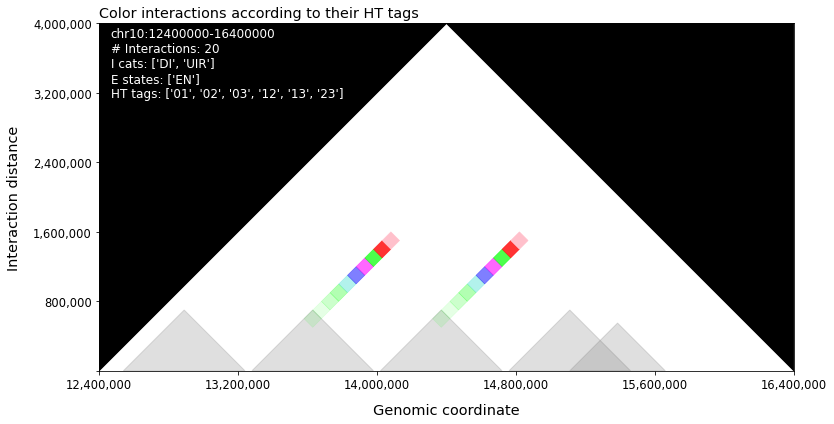

In [6]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI','UIR'],
                                enr_cat_list = ['EN'],
                                color_i_cats = False,
                                plot_title = 'Color interactions according to their HT tags')

The interaction can als be filtered based on their HT tag. The following plot shows only interactions with the tags `01` (`pink`), `02` (`red`) and `03` (`lime`).

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 44 interactions in range:
		chr10:12400000-16400000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['EN']
		[INFO] HT tag:
			['01', '02', '03']
		[INFO] Number interactions:
			14
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[11.3 12.  12.9 13.2 14.  17.2 18.1 19.  19.7 20. ]
[INFO] ... done.


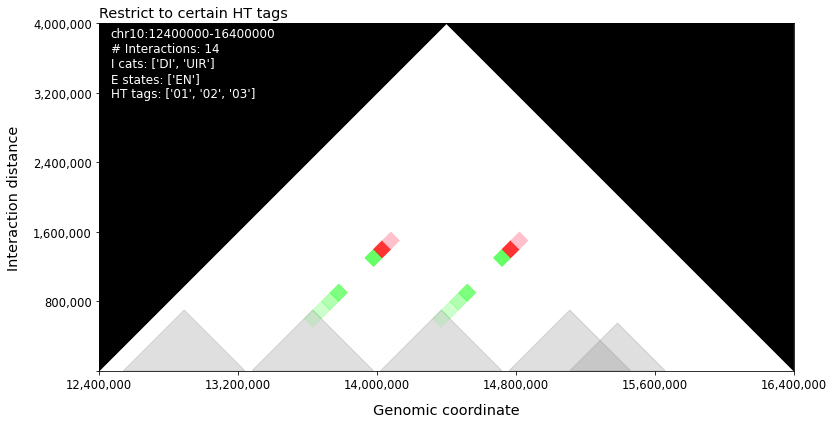

In [7]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI','UIR'],
                                enr_cat_list = ['EN'],
                                color_i_cats = False,
                                ht_tag_list = ['01','02','03'],
                                plot_title = 'Restrict to certain HT tags')

## Visualization of capture Hi-C data

### Input data

There is one CHC dataset for each of the 17 cell types and, for eight of the cell types, there are HC data and TAD boundaries.

In [8]:
#CELL_TYPE_SHORT = 'MK'            # Has HC data
#CELL_TYPE_SHORT = 'ERY'           # Has HC data
#CELL_TYPE_SHORT = 'NEU'           # Has HC data
#CELL_TYPE_SHORT = 'MON'           # Has HC data
CELL_TYPE_SHORT = 'MAC_M0'        # Has HC data
#CELL_TYPE_SHORT = 'MAC_M1'
#CELL_TYPE_SHORT = 'MAC_M2'
#CELL_TYPE_SHORT = 'EP'
#CELL_TYPE_SHORT = 'NB'            # Has HC data
#CELL_TYPE_SHORT = 'TB'
#CELL_TYPE_SHORT = 'FOET'
#CELL_TYPE_SHORT = 'NCD4'          # Has HC data
#CELL_TYPE_SHORT = 'TCD4'
#CELL_TYPE_SHORT = 'NACD4'
#CELL_TYPE_SHORT = 'ACD4'
#CELL_TYPE_SHORT = 'NCD8'          # Has HC data
#CELL_TYPE_SHORT = 'TCD8'

Load one of the eight BED files with the published TADs or a BED file with TADs from all eight cell types.

In [9]:
TAD_BED_FILE = '../additional_files/javierre_2016/tad_regions_hg38/hglft_genome_TADs_' + CELL_TYPE_SHORT + '_hg38.bed'
TAD_BED_FILE = '../additional_files/javierre_2016/tad_regions_hg38/all_tad_regions.bed'

Load an interaction file that was created with `DICer`.

In [10]:
PROTOCOL = 'CHC'
MIN_I_DIST = '20000'
FDR = '01'
RPC_RULE = 'ht'
if PROTOCOL == 'CHC':
    INTERACTION_FILE = '../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/CHC/JAV_' + CELL_TYPE_SHORT + '_RALT_20000_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_CHC_RALT_' + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC':
    INTERACTION_FILE = '../DICer_interactions/' + RPC_RULE.upper() + '/FDR0' + FDR + '/HC/' + MIN_I_DIST + '/JAV_' + CELL_TYPE_SHORT + '_HC_RALT_' + MIN_I_DIST + '_' + RPC_RULE + '_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + CELL_TYPE_SHORT + '_HC_RALT_'  + MIN_I_DIST + '_' + RPC_RULE.lower()
if PROTOCOL == 'HC_POOLED':
    INTERACTION_FILE = '../DICer_interactions/HT/FDR0' + FDR + '/HC/20000/JAV_ALL_HC_RALL_ALT_20000_ht_fdr0.' + FDR + '_evaluated_and_categorized_interactions.tsv.gz'
    OUT_PREFIX = 'JAV_' + 'POOLED_HC_FDR005' + '_HC_RALT_20000_' + RPC_RULE.lower()

# Uncomment one of the following lines for development
#INTERACTION_FILE = '/Users/robinp/Downloads/JAV_MK_RALT_20000_ht_fdr0.05_evaluated_and_categorized_interactions.tsv.gz'

# Small files for chromosome 'chr10' only
#INTERACTION_FILE = '/Users/hansep/PycharmProjects/diachrscripts/DICer_interactions/HT/FDR005/CHC/JAV_MAC_M0_RALT_20000_ht_fdr0.05_evaluated_and_categorized_interactions_chr10.tsv.gz'
#INTERACTION_FILE = '/Users/hansep/PycharmProjects/diachrscripts/DICer_interactions/HT/FDR001/CHC/JAV_MAC_M0_RALT_20000_ht_fdr0.01_evaluated_and_categorized_interactions_chr10.tsv.gz'

In [11]:
visualizer = CHCTadViz(i_file=INTERACTION_FILE, t_file=TAD_BED_FILE, verbose=True)

[INFO] Initializing DirectedTadVisualizer object ...
	[INFO] Reading interactions and group them by chromosomes ...
		chr2: 516,455 interactions
		chr12: 339,793 interactions
		chr7: 291,701 interactions
		chr3: 427,545 interactions
		chrX: 127,436 interactions
		chr1: 636,723 interactions
		chr6: 380,065 interactions
		chr18: 116,796 interactions
		chr11: 381,489 interactions
		chr16: 146,335 interactions
		chr8: 292,190 interactions
		chr5: 373,859 interactions
		chr14: 228,755 interactions
		chr4: 316,975 interactions
		chr19: 139,903 interactions
		chr10: 283,778 interactions
		chr15: 185,896 interactions
		chr20: 159,368 interactions
		chr13: 160,890 interactions
		chr22: 87,548 interactions
		chr9: 258,370 interactions
		chr17: 220,396 interactions
		chr21: 76,608 interactions
		chrY: 1,966 interactions
	[INFO] ... done.
	[INFO] Reading TAD regions and group them by chromosomes ...
		chr1: 2,181 TADs
		chr10: 1,055 TADs
		chr11: 1,244 TADs
		chr12: 1,224 TADs
		chr13: 679 TADs
		

### Compare interaction categories

First we show all interaction categories in one plot. But we restrict to interactions in which only one of the two digests was selected for enrichment (`NE` or `EN`). For the capture Hi-C datasets shown here, these interactions account for more than 90% of all interactions.

In [12]:
chrom = 'chr10'
begin = 13000000
end = begin + 2500000

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 7,718 interactions in range:
		chr10:13000000-15500000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DIX', 'DI', 'UIR', 'UI']
		[INFO] Enrichment status:
			['NE', 'EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			7,113
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[  10.   11.   14.   16.   20.   25.   34.   55.  103. 1003.]
[INFO] ... done.


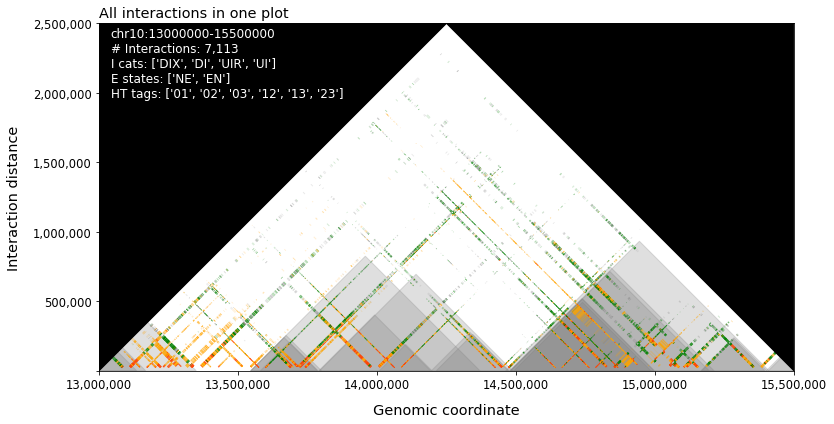

In [13]:
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DIX', 'DI', 'UIR', 'UI'],
                                enr_cat_list = ['NE','EN'],
                                plot_title = 'All interactions in one plot')

This plot shows capture Hi-C interactions between `HindIII` restriction fragments. Because restriction fragments are of different lengths, the tetragons are rectangular. The data was not corrected for distance-dependent interaction frequencies, so that the interactions spread out from the baits to the left and right. The four interaction categories `DIX` (orangered), `DI` (orange), `UIR` (green) and `UI` (gray) are shown in different colors. Note that the `UI` interactions can hardely be recognized because they have the lowest read pair counts of the the interactions shown. The TAD regions are shown as transparent triangles in the background. In this case, we have loaded the file with the TAD regions from all eight cell types, so that a genomic region can be covered by several TADs. Due to the transparent display of TADs, the gray triangles over such regions are darker.

Alternatively, create one plot separately for each interaction category.

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 7,718 interactions in range:
		chr10:13000000-15500000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DIX']
		[INFO] Enrichment status:
			['NE', 'EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			834
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[  49.    61.    75.    90.   111.   127.   153.1  187.4  249.4 1003. ]
[INFO] ... done.
[INFO] Creating visualization ...
	[INFO] Extracted a total number of 7,718 interactions in range:
		chr10:13000000-15500000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI']
		[INFO] Enrichment status:
			['NE', 'EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			2,376
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3

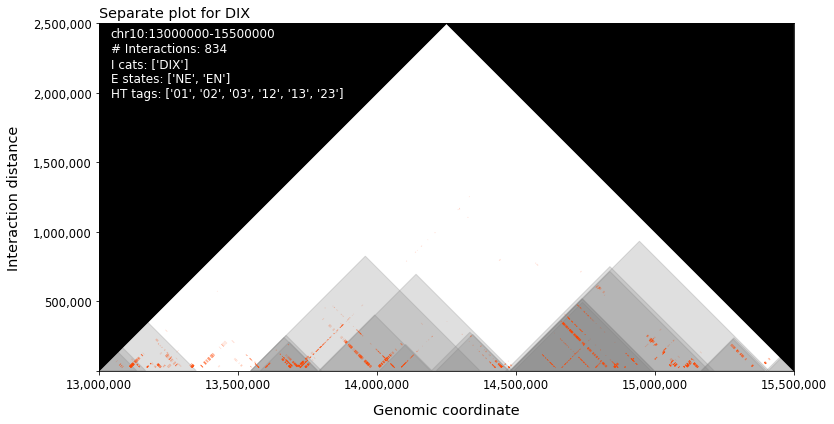

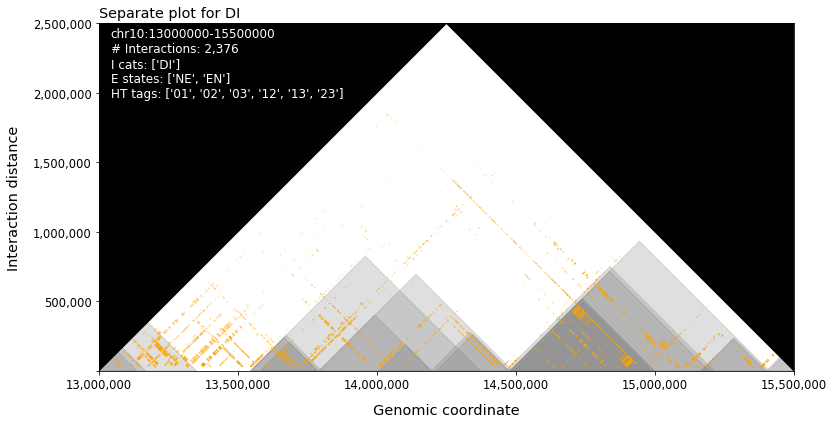

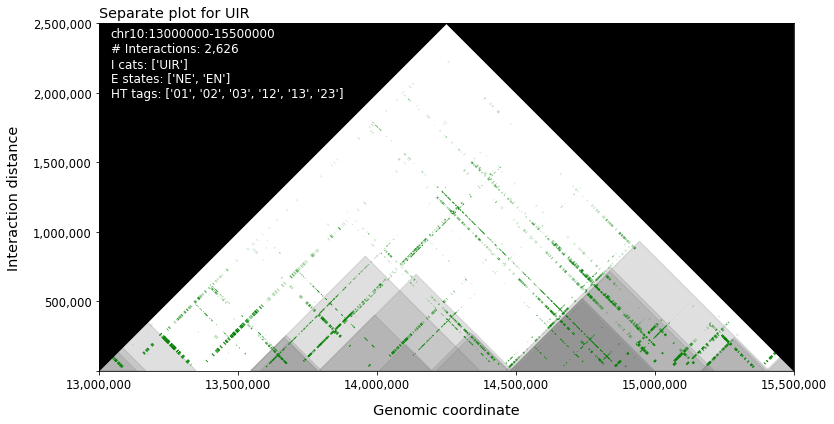

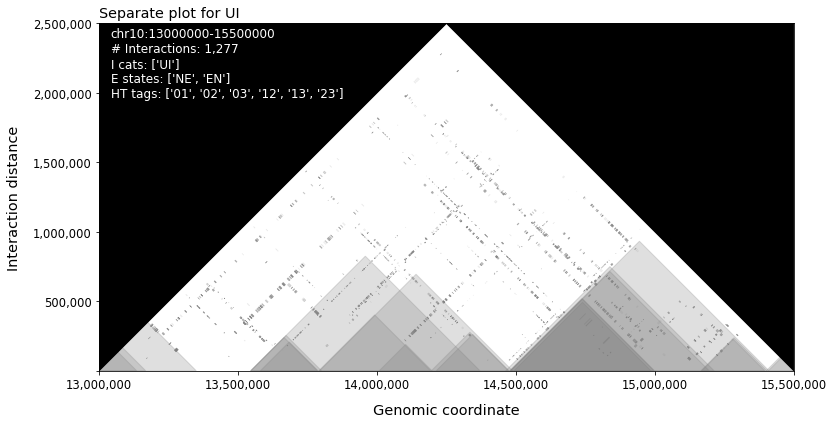

In [14]:
for i_cat in ['DIX','DI','UIR','UI']:
    TadViz_plot = visualizer.create_visualization(
                                    chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = [i_cat],
                                    enr_cat_list = ['NE','EN'],
                                    plot_title = 'Separate plot for ' + i_cat)

`DI` and `UIR` are comparable -> Show in one plot

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 7,718 interactions in range:
		chr10:13000000-15500000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI', 'UIR']
		[INFO] Enrichment status:
			['NE', 'EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			5,002
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 10.  12.  15.  18.  21.  25.  31.  43.  70. 694.]
[INFO] ... done.


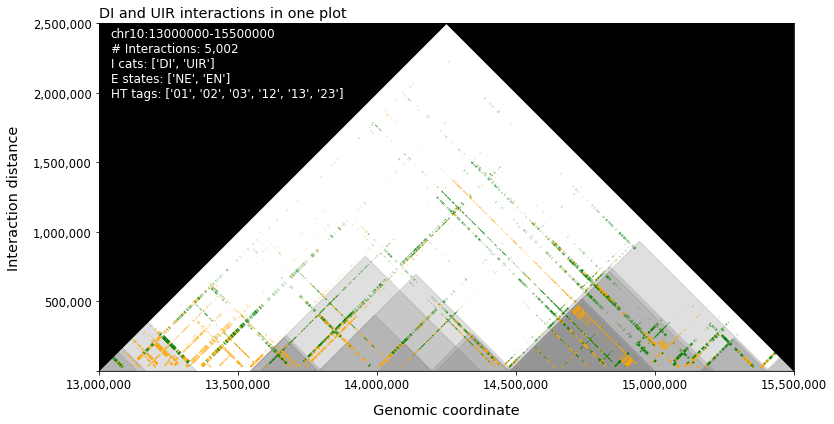

In [15]:
TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI', 'UIR'],
                                enr_cat_list = ['NE','EN'],
                                plot_title = 'DI and UIR interactions in one plot')

#### Slide a window along the genome and find interesting regions

So far, we have only looked at one region. The following codes moves a window of width `2,000,000` bp along the genome and generates a plot for each window position. We restrict to the interaction categories `DI` and `UIR` and the enrichment state `EN`.

Creating plot for: chr10:65000000-67000000
Creating plot for: chr10:66000000-68000000
Creating plot for: chr10:67000000-69000000
Creating plot for: chr10:68000000-70000000
Creating plot for: chr10:69000000-71000000
Creating plot for: chr10:70000000-72000000
Creating plot for: chr10:71000000-73000000
Creating plot for: chr10:72000000-74000000
Creating plot for: chr10:73000000-75000000
Creating plot for: chr10:74000000-76000000
Creating plot for: chr10:75000000-77000000
Creating plot for: chr10:76000000-78000000
Creating plot for: chr10:77000000-79000000
Creating plot for: chr10:78000000-80000000
Creating plot for: chr10:79000000-81000000
Creating plot for: chr10:80000000-82000000
Creating plot for: chr10:81000000-83000000
Creating plot for: chr10:82000000-84000000
Creating plot for: chr10:83000000-85000000
Creating plot for: chr10:84000000-86000000


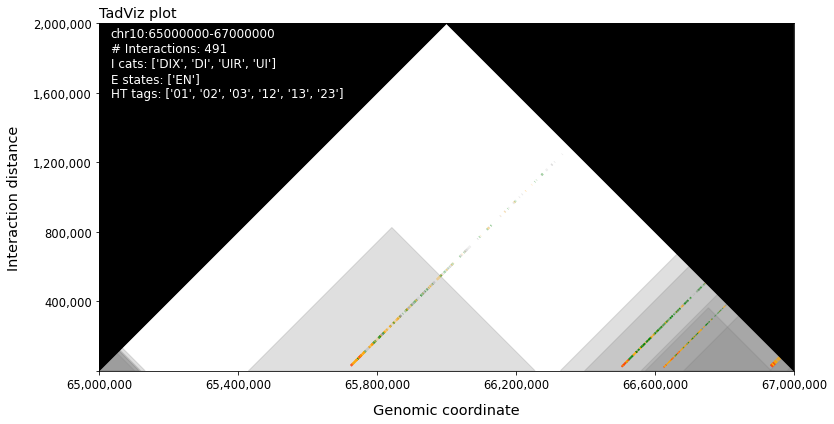

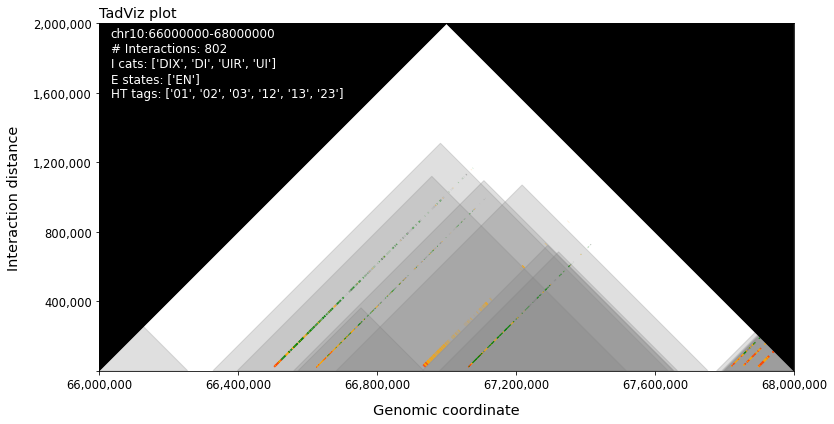

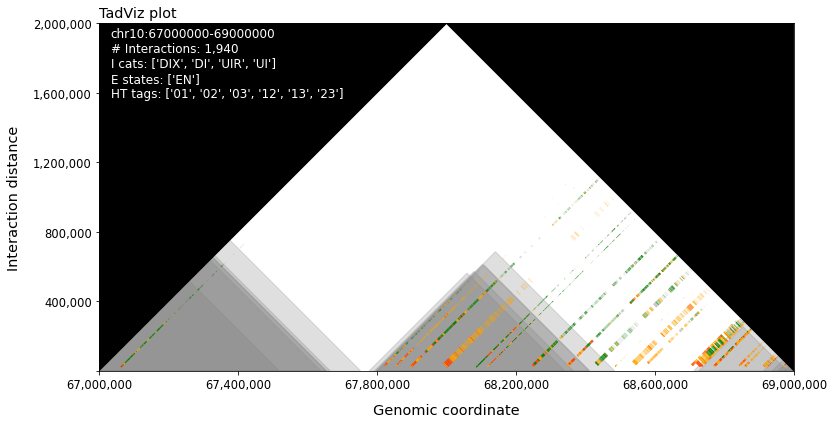

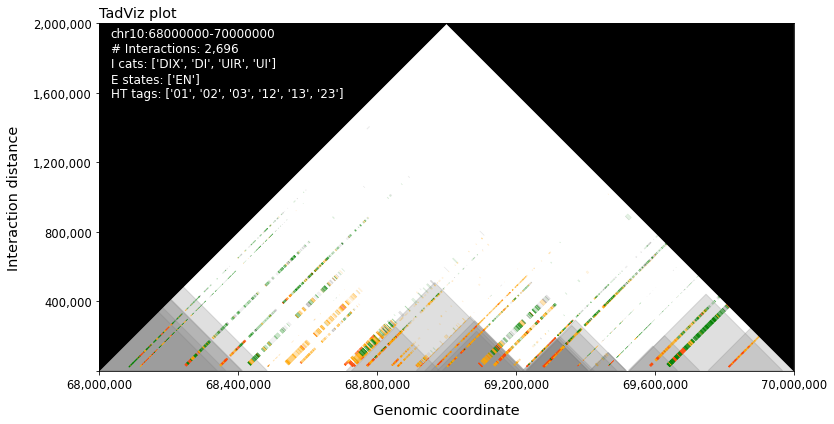

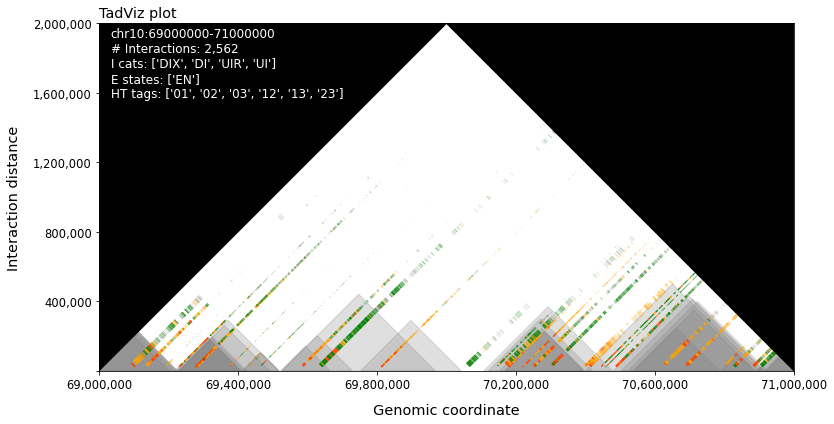

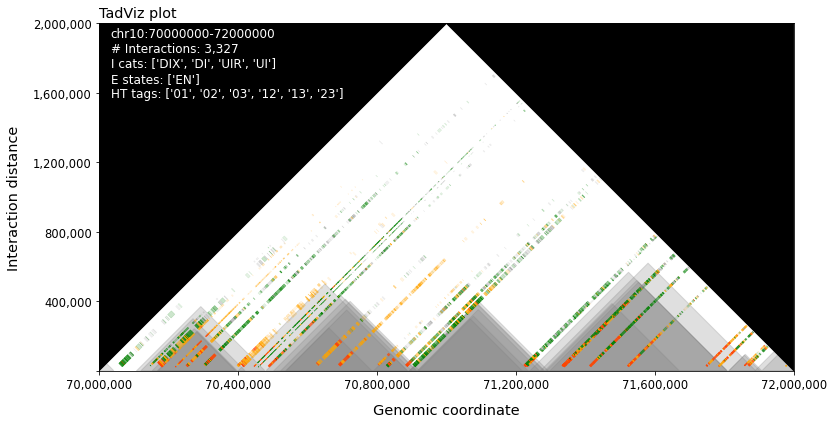

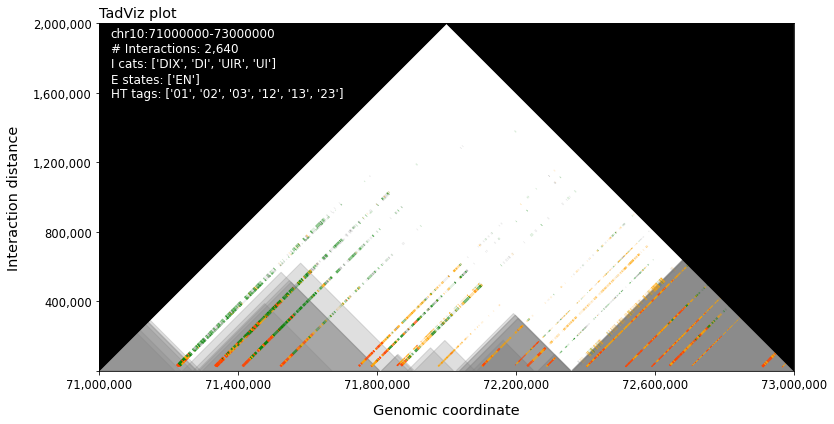

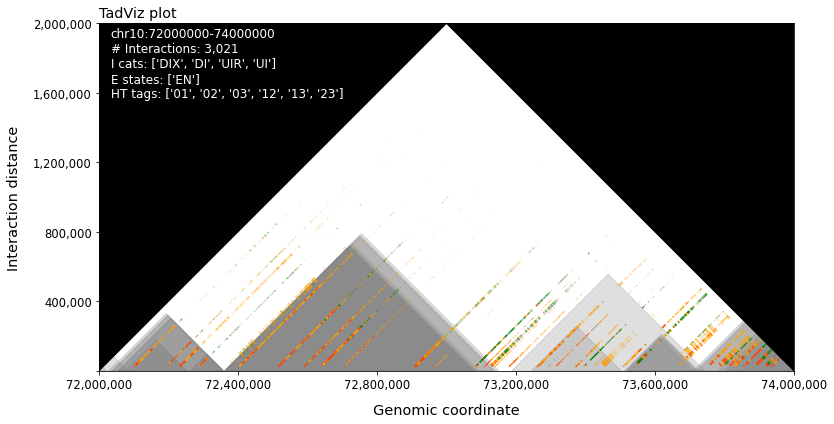

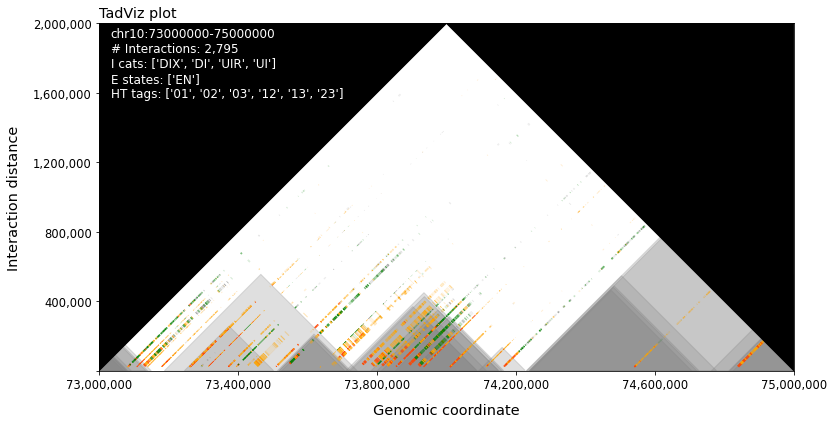

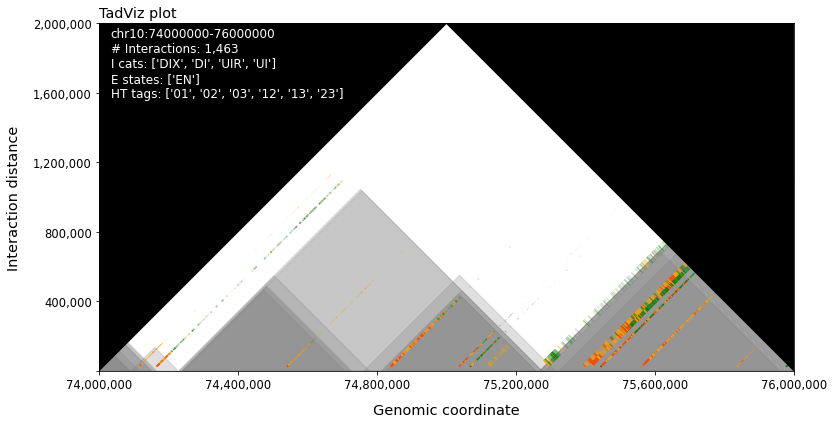

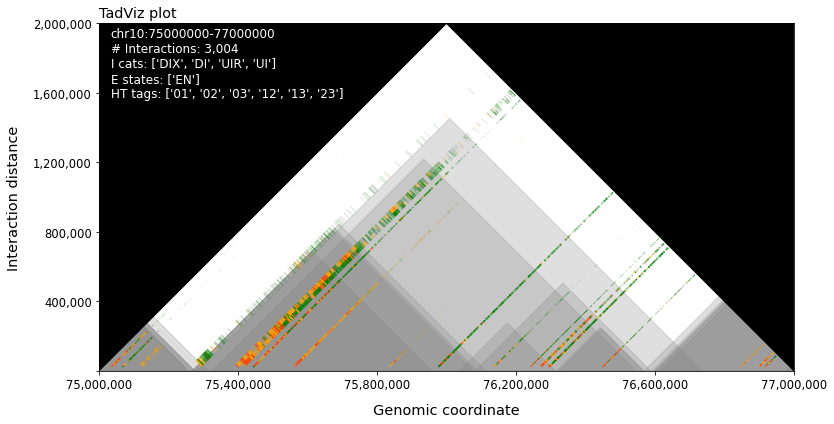

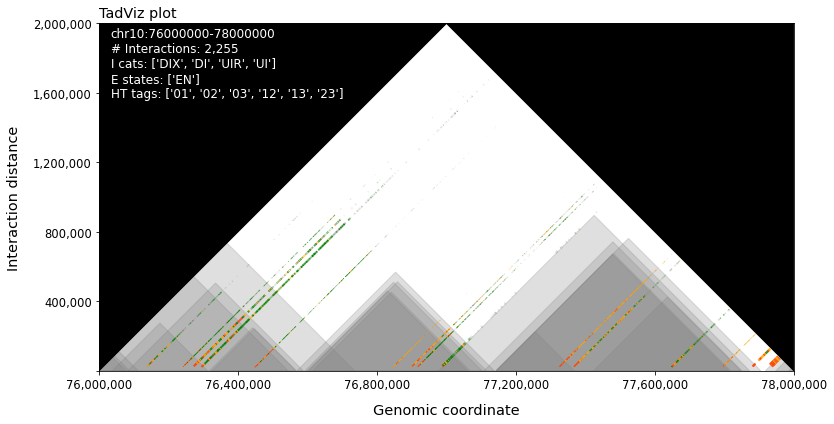

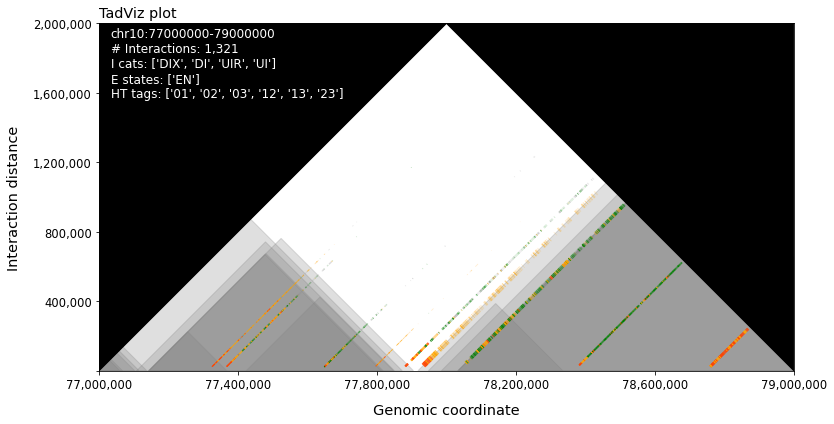

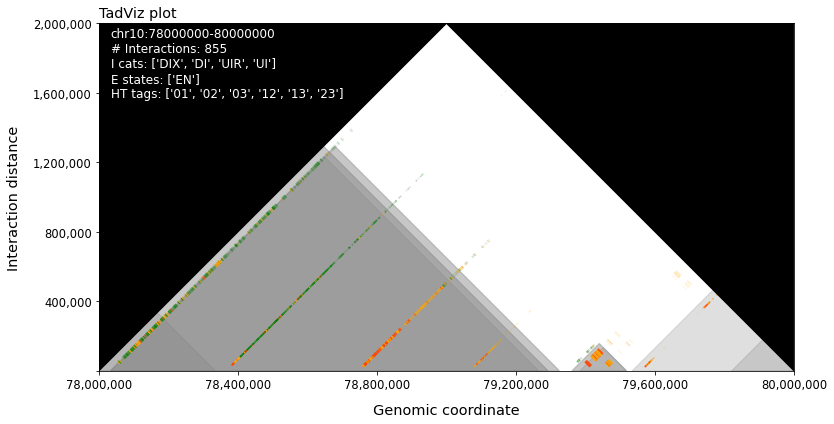

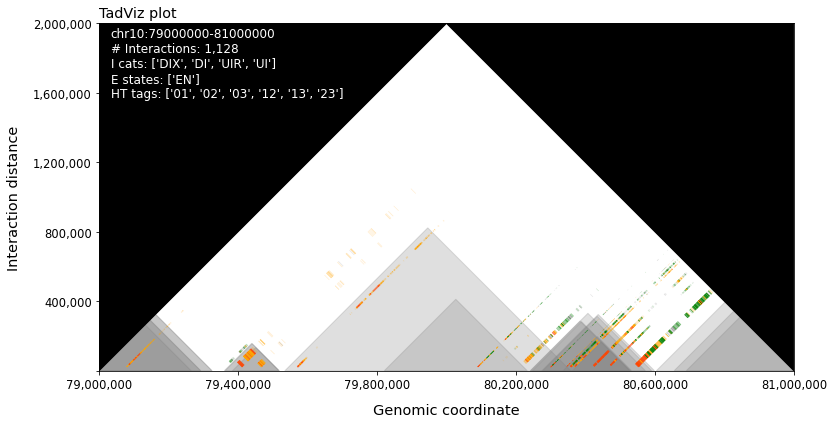

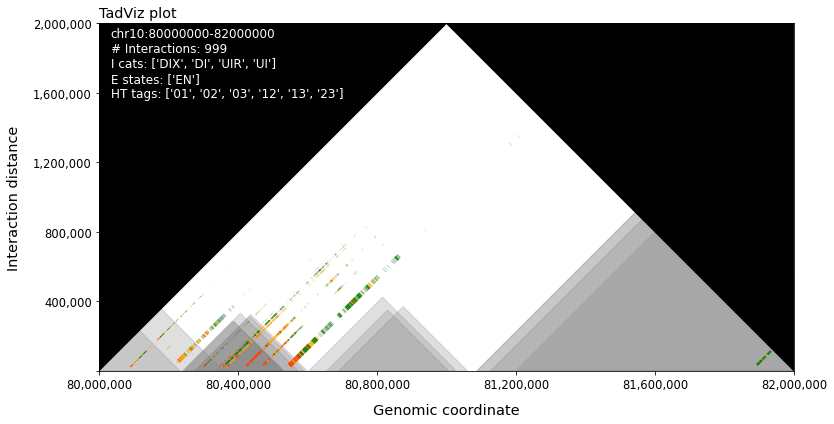

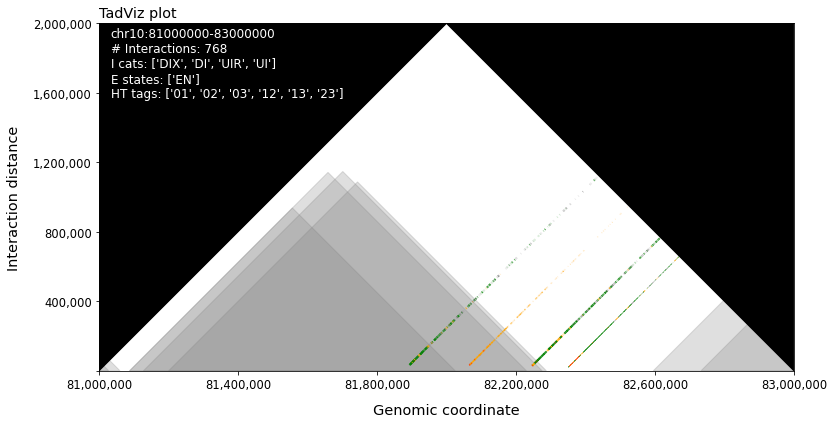

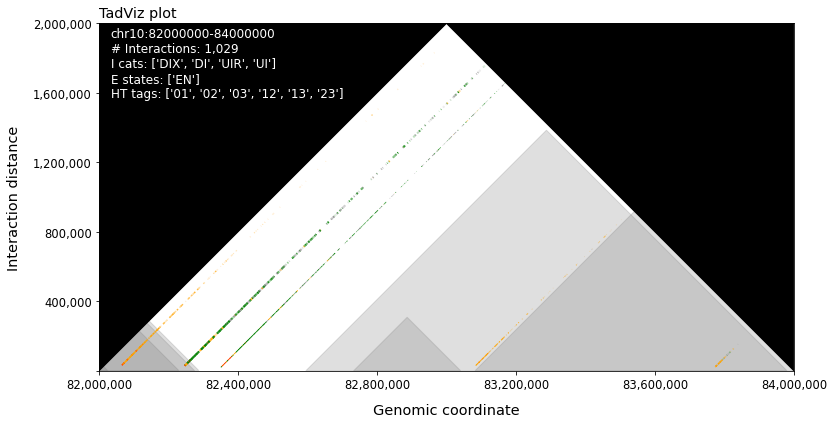

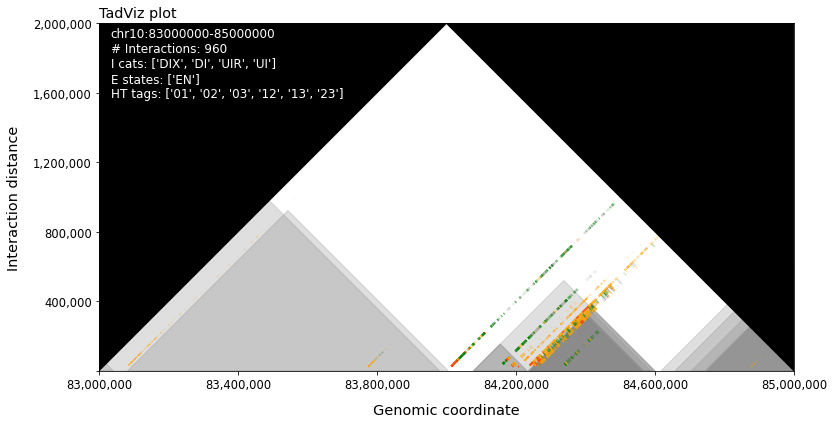

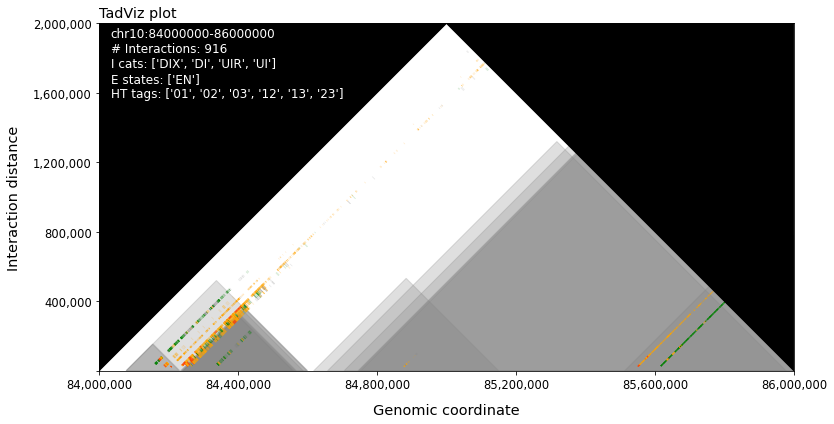

In [16]:
i_cats = ['DIX', 'DI', 'UIR', 'UI']
enr_cats = ['EN']
chrom = 'chr10'
from_pos = 65000000
to_pos = from_pos + 20000000
window_size = 2000000
shift_size = int(window_size/2)
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
    TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = i_cats,
                                    enr_cat_list = enr_cats,
                                    verbose=False)

### Compare HT tags

If `color_i_cats=False`, then the interaction are colored according to their HT tags. The colors were assigned as follows:

```
'01': 'pink',
'02': 'red',
'03': 'lime',
'12': 'magenta',
'13': 'blue',
'23': 'turquoise'
```

We had already seen that unbalanced interactions with the HT tags `03` and `12` go more often from the bait to the left (`NE`), whereas interactions with the tags `02` and `13` go more often from the bait to the right (`EN`). For balanced interaction. For balanced interactions, we did not make this observation.

```
DI
['03', '12'] -> lime, magenta -> from the baits to the left (NE)
['02', '13'] -> red, blue ->  -> from the baits to the right (EN)
UIR
['03', '12'] -> lime, magenta -> from the baits to the left (NE) and right (EN)
['02', '13'] -> red, blue ->  -> from the baits to the left (NE) and right (EN)

```

Now we want to check whether this observation is also reflected in the TadViz-Plots. For this purpose, we did two analyzes:

1. For each inteaction category, plot `NE` and `EN` interactions separately. If the HT tags `03` (lime) and `12` (magenta) predominate for `NE` interactions and the HT tags `02` (red) and `13` (blue) predominate for `EN` interactions, then the previous obervation is reflected in the TadViz plots.
2. For the second analysis, we go the opposite way. For each interaction category, we plot both `NE` and `EN` interactions, but either only interactions with the HT tags `03` (lime) and `12` (magenta) or only interactions with the HT tags `02` (red) and `13` (blue). If the `NE` interactions predominate in the interactions with the HT tags `03` (lime) and `12` (magenta) and the `EN` interactions in the iteractions with the HT tags `02` (red) and `13` (blue), then the previous observation is also reflected in the TadViz plots.


Some interesting regions:
```
chr1:23500000-25000000
chr10:68750000-71250000
chr2:25000000-27000000
```

#### For each inteaction category, plot `NE` and `EN` interactions separately (1)

Create two times eight PDFs for one region.

In [17]:
chrom = 'chr1'
begin = 23500000
end = 25000000
pdf_file_name_prefix = 'TadViz_ht_tag_' + chrom + ':' + str(begin) + '-' + str(end)

Creating plot for: chr1:23500000-25000000
	e_cat: NE
		i_cat: DIX
		i_cat: DI
		i_cat: UIR
		i_cat: UI
	e_cat: EN
		i_cat: DIX
		i_cat: DI
		i_cat: UIR
		i_cat: UI


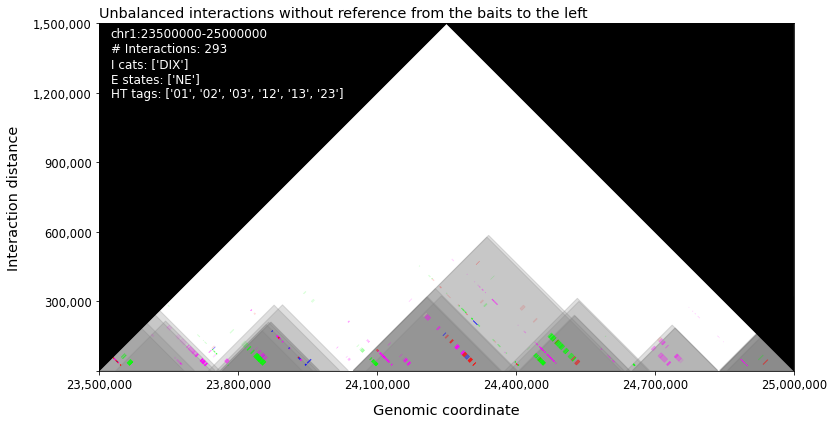

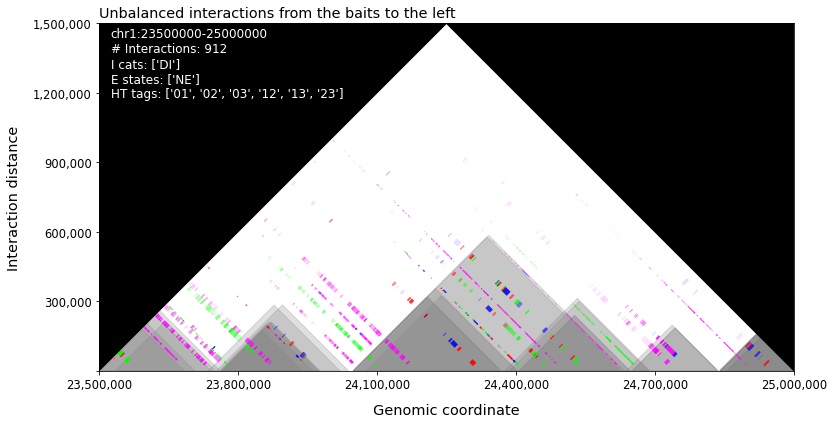

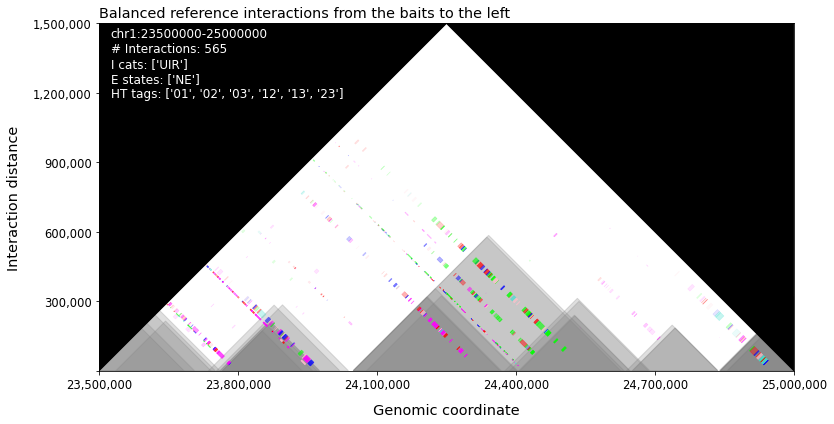

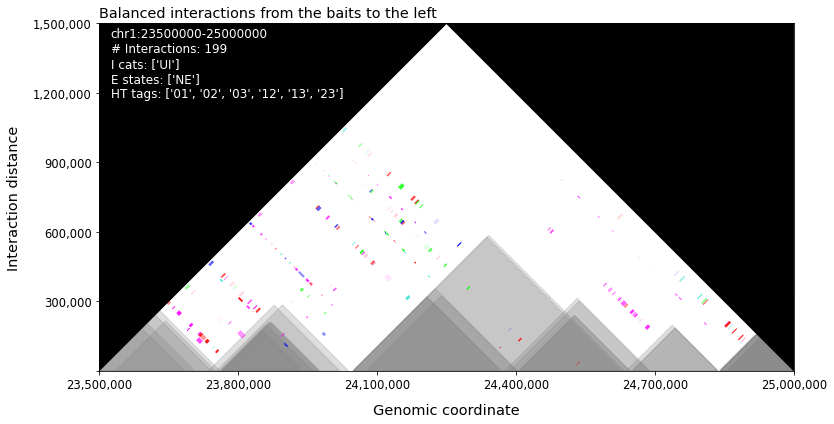

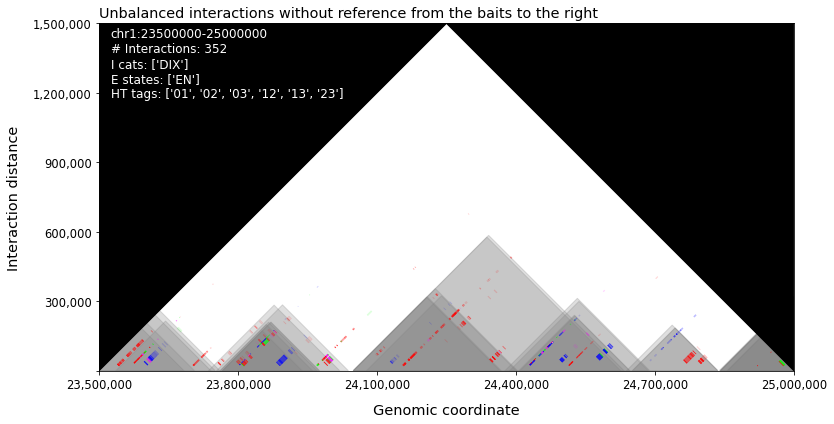

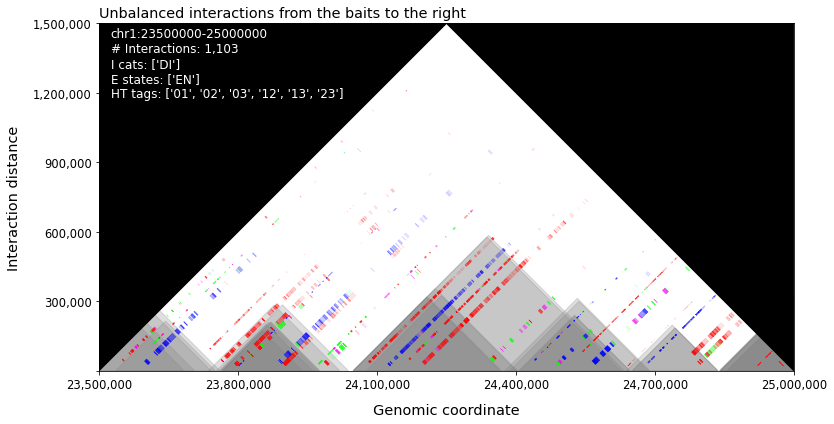

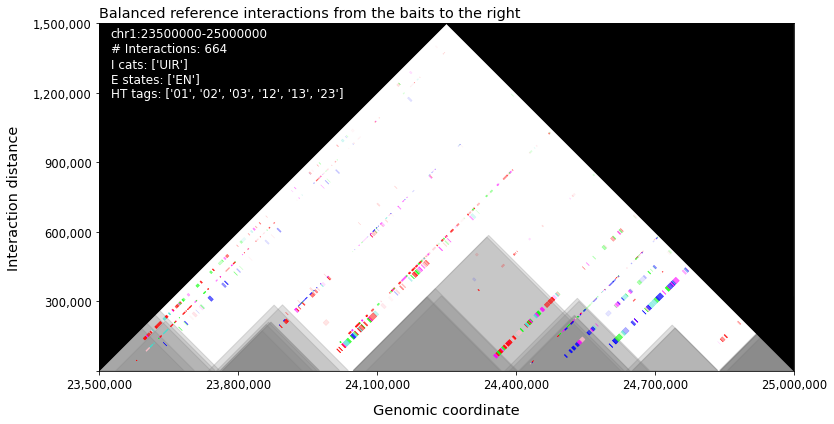

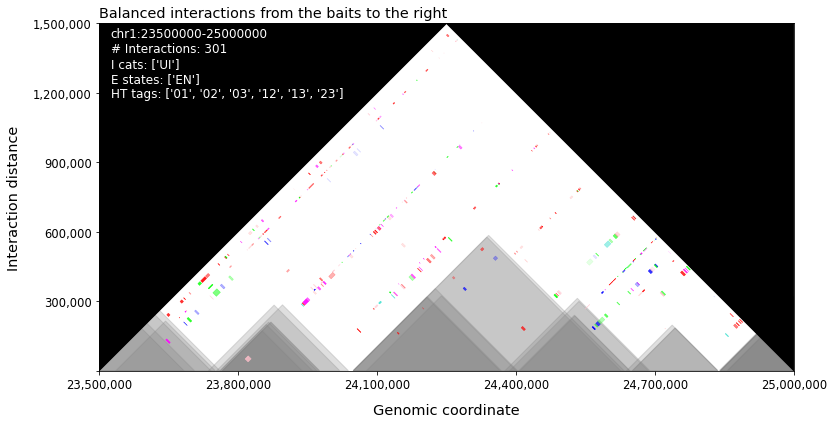

In [18]:
print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
for e_cat in ['NE', 'EN']:
    print("\te_cat: " + e_cat)
    for i_cat in ['DIX', 'DI', 'UIR', 'UI']:
        print("\t\ti_cat: " + i_cat)
        if i_cat == 'DIX':
            plot_title = 'Unbalanced interactions without reference'
        if i_cat == 'DI':
            plot_title = 'Unbalanced interactions'
        if i_cat == 'UIR':
            plot_title = 'Balanced reference interactions'
        if i_cat == 'UI':
            plot_title = 'Balanced interactions'
        if e_cat == 'NE':
            plot_title = plot_title + ' from the baits to the left'
        if e_cat == 'EN':
            plot_title = plot_title + ' from the baits to the right'
        TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                        begin = begin,
                                        end = end,
                                        inter_cat_list = [i_cat],
                                        enr_cat_list = [e_cat],
                                        color_i_cats=False,
                                        plot_title = plot_title,
                                        pdf_file_name = pdf_file_name_prefix + '_' + e_cat + '_' + i_cat + '.pdf',
                                        verbose=False)

#### For each inteaction category, plot `NE` and `EN` interactions but separately for HT tags `('03', '12')` and  `('02', '13')`  (2)

Create two times eight PDFs for one region.

Creating plot for: chr1:23500000-25000000
	ht_tags: ['03', '12']
		i_cat: DIX
		i_cat: DI
		i_cat: UIR
		i_cat: UI
	ht_tags: ['02', '13']
		i_cat: DIX
		i_cat: DI
		i_cat: UIR
		i_cat: UI


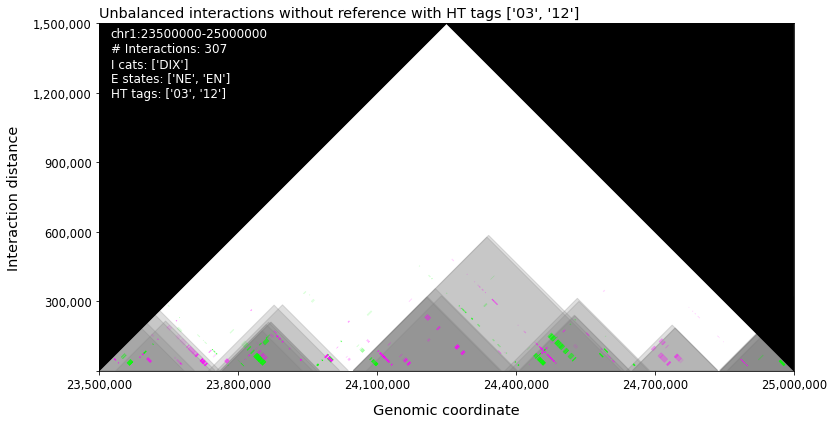

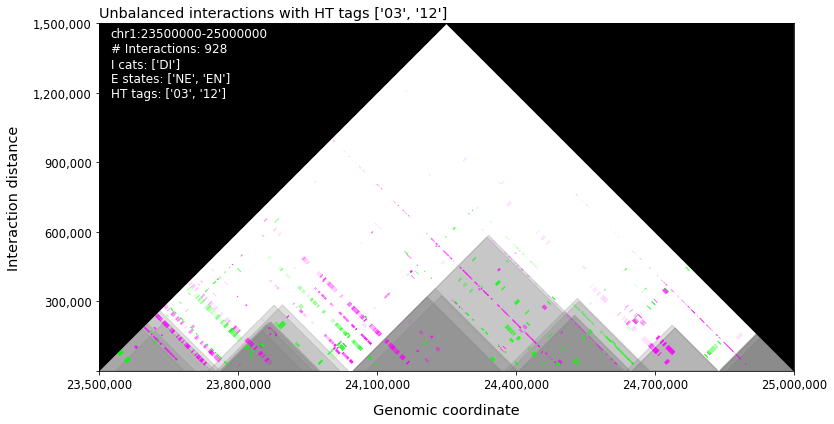

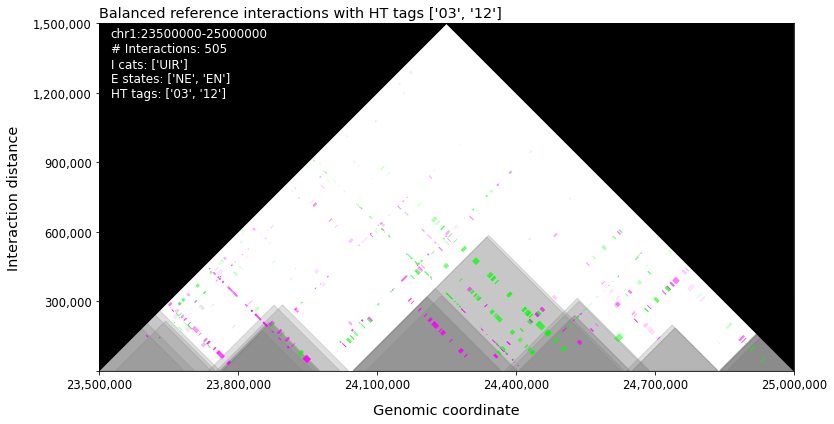

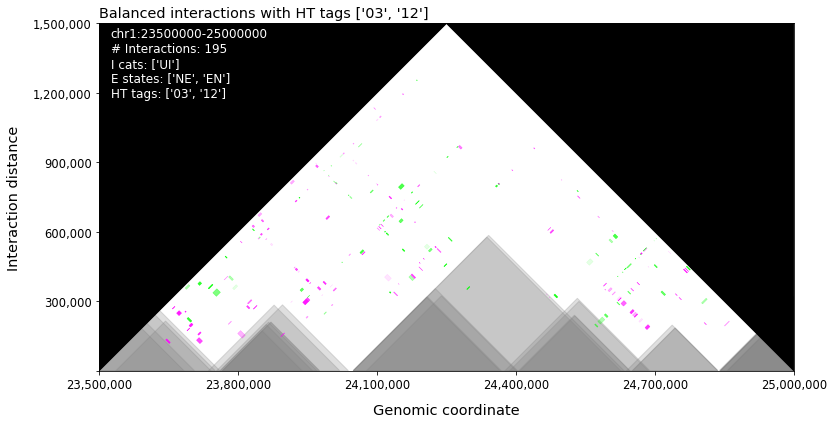

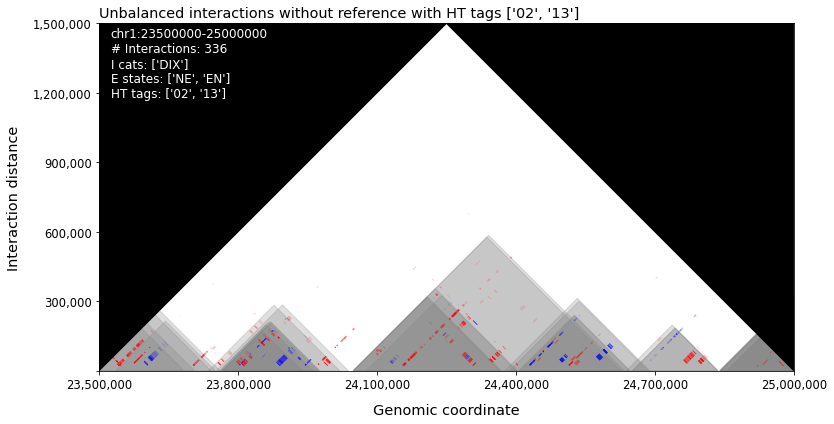

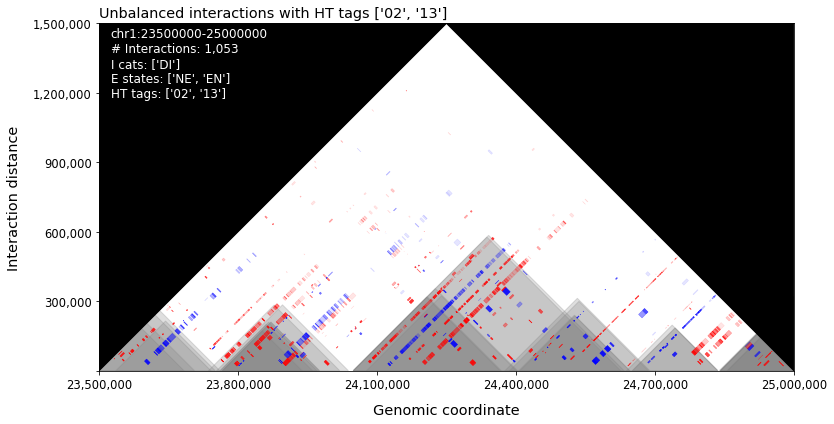

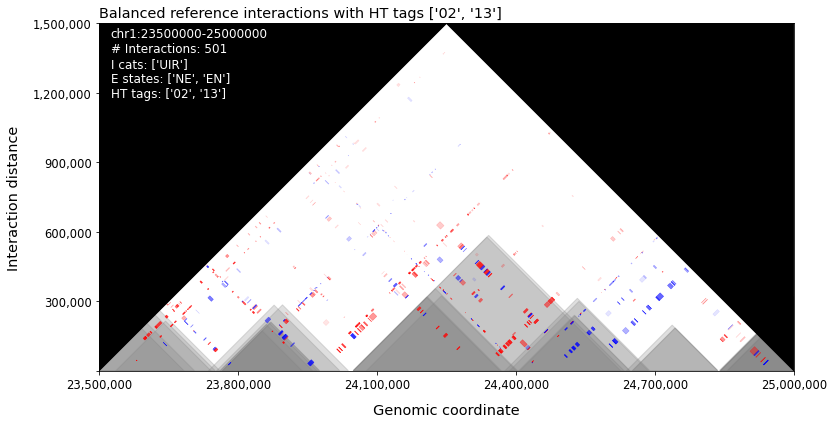

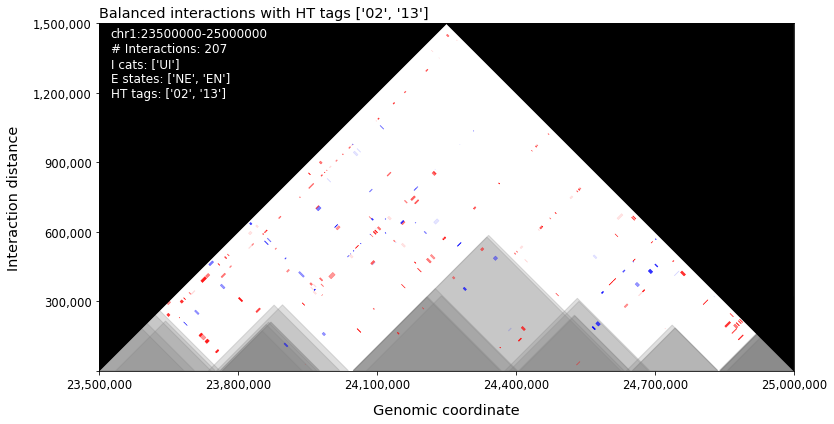

In [19]:
print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
for ht_tag_list in [['03', '12'], ['02', '13']]:
    print("\tht_tags: " + str(ht_tag_list))
    for i_cat in ['DIX', 'DI', 'UIR', 'UI']:
        print("\t\ti_cat: " + i_cat)
        if i_cat == 'DIX':
            plot_title = 'Unbalanced interactions without reference'
        if i_cat == 'DI':
            plot_title = 'Unbalanced interactions'
        if i_cat == 'UIR':
            plot_title = 'Balanced reference interactions'
        if i_cat == 'UI':
            plot_title = 'Balanced interactions'
        TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                        begin = begin,
                                        end = end,
                                        inter_cat_list = [i_cat],
                                        enr_cat_list = ['NE', 'EN'],
                                        ht_tag_list = ht_tag_list,
                                        color_i_cats = False,
                                        plot_title = plot_title + ' with HT tags ' + str(ht_tag_list), 
                                        pdf_file_name = pdf_file_name_prefix + '_' + str(ht_tag_list) + '_' + i_cat + '.pdf',
                                        verbose=False)

#### Find interesting regions ...

```
chr1:22500000-27500000
chr10:68750000-71250000
chr2:8750000-11250000
chr2:10000000-12500000
chr2:10000000-12000000
chr2:25000000-27000000
```

Open BED file with baited digests and find regions with high density of baits.

Creating plot for: chr4:60000000-61000000
	ht_tags: ['03', '12']
		i_cat: DI
		i_cat: UIR
	ht_tags: ['02', '13']
		i_cat: DI
		i_cat: UIR
[ERROR] After filtering, there are no interactions left to be visualized!
Creating plot for: chr4:60500000-61500000
	ht_tags: ['03', '12']
		i_cat: DI
		i_cat: UIR
	ht_tags: ['02', '13']
		i_cat: DI
		i_cat: UIR
Creating plot for: chr4:61000000-62000000
	ht_tags: ['03', '12']
		i_cat: DI
		i_cat: UIR
	ht_tags: ['02', '13']
		i_cat: DI
		i_cat: UIR
Creating plot for: chr4:61500000-62500000
	ht_tags: ['03', '12']
		i_cat: DI
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: UIR
[ERROR] After filtering, there are no interactions left to be visualized!
	ht_tags: ['02', '13']
		i_cat: DI
[ERROR] After filtering, there are no interactions left to be visualized!
		i_cat: UIR
[ERROR] After filtering, there are no interactions left to be visualized!
Creating plot for: chr4:62000000-63000000
	ht_tags: ['03', '12']
		i_cat: DI
[

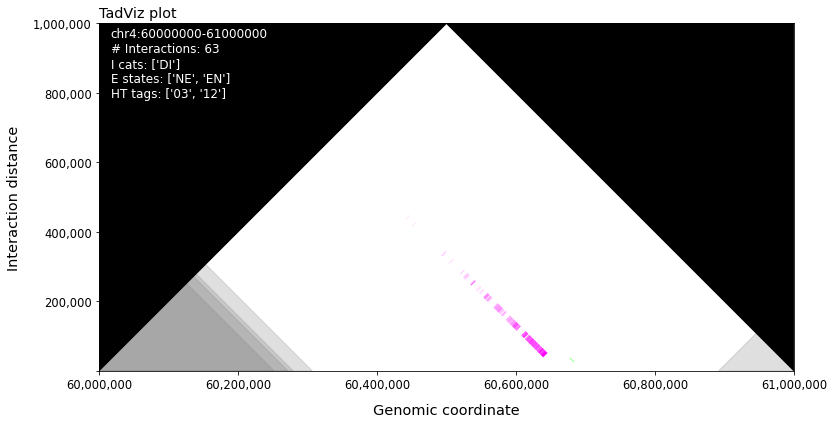

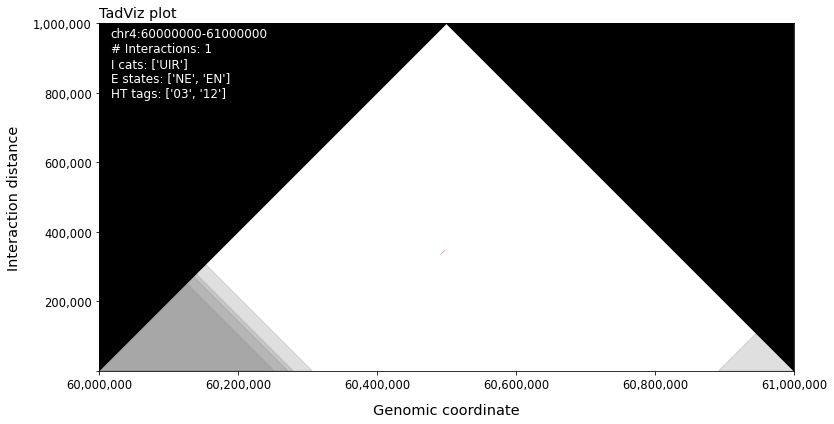

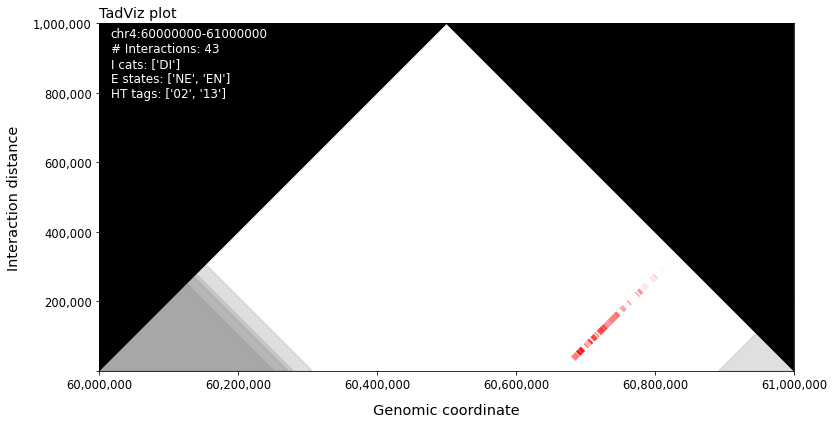

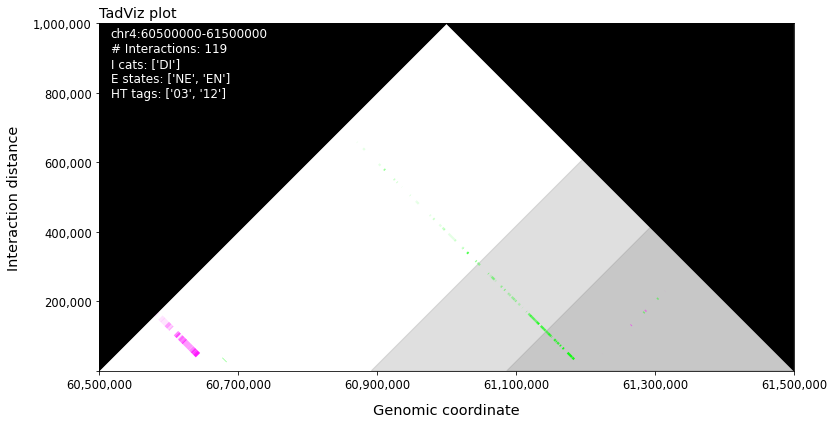

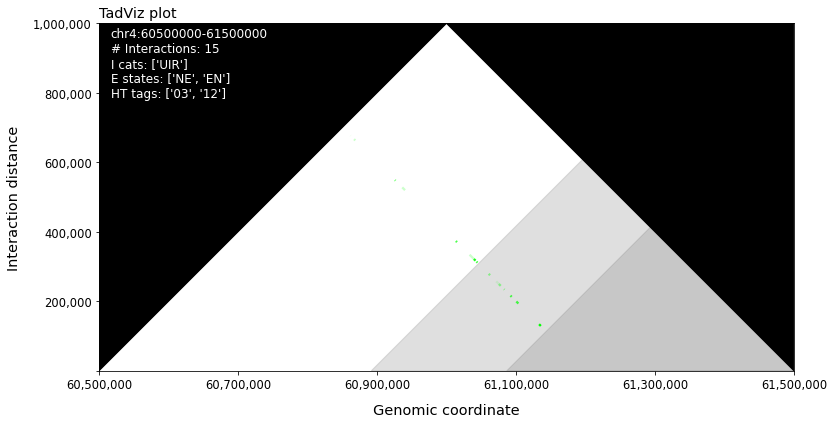

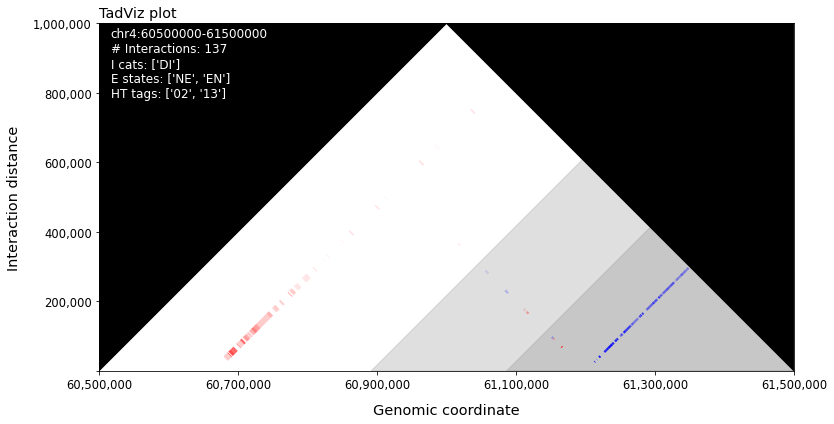

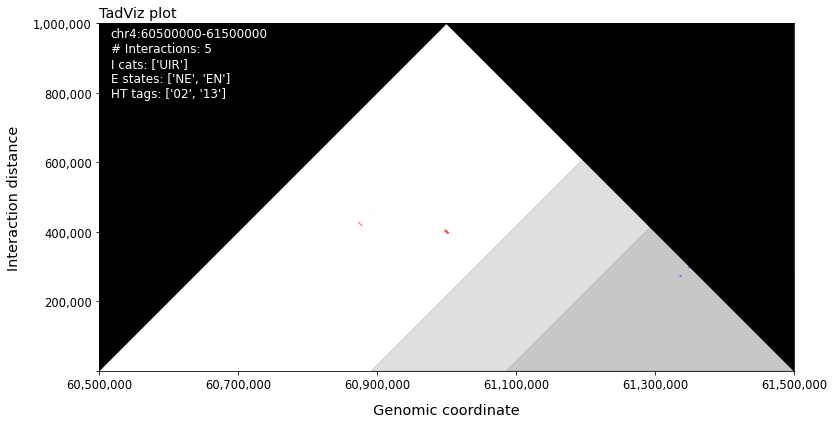

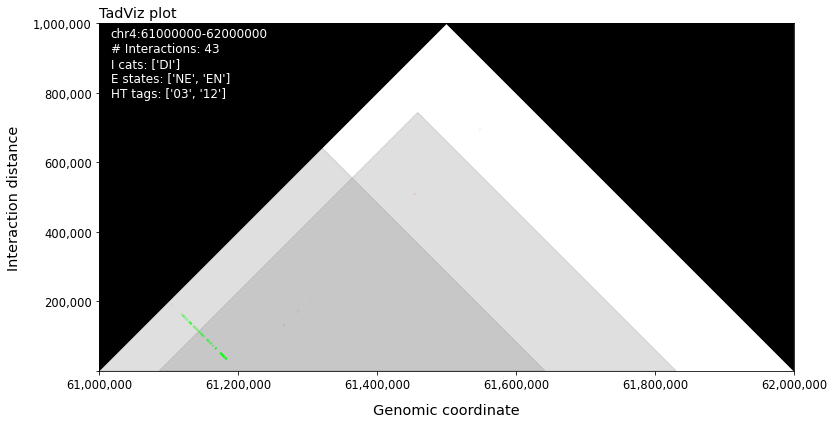

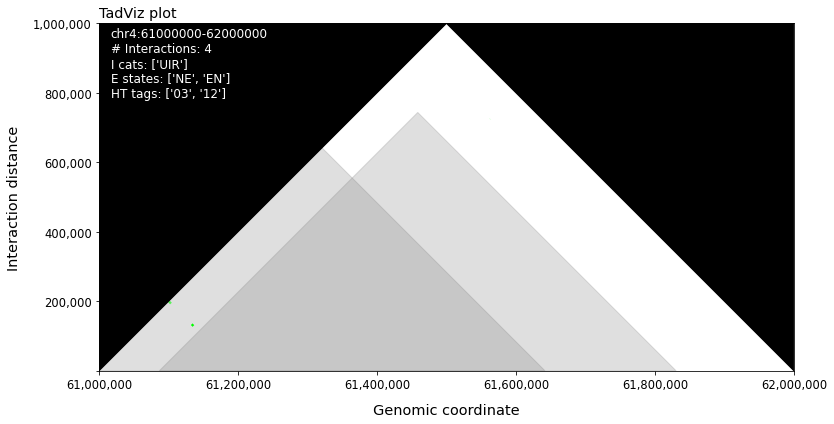

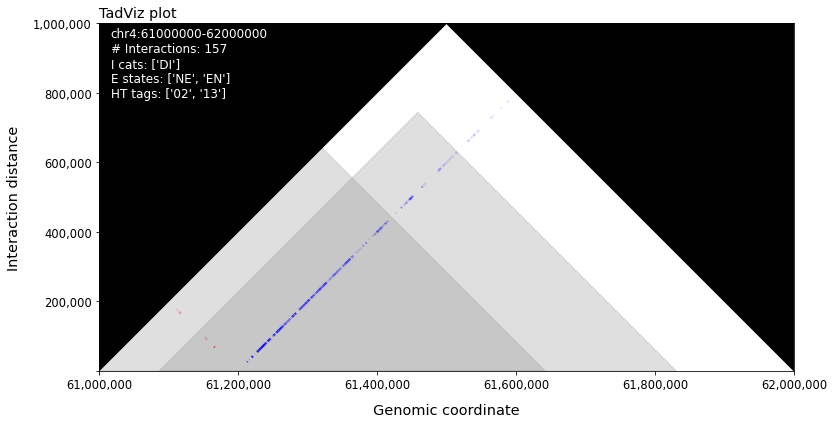

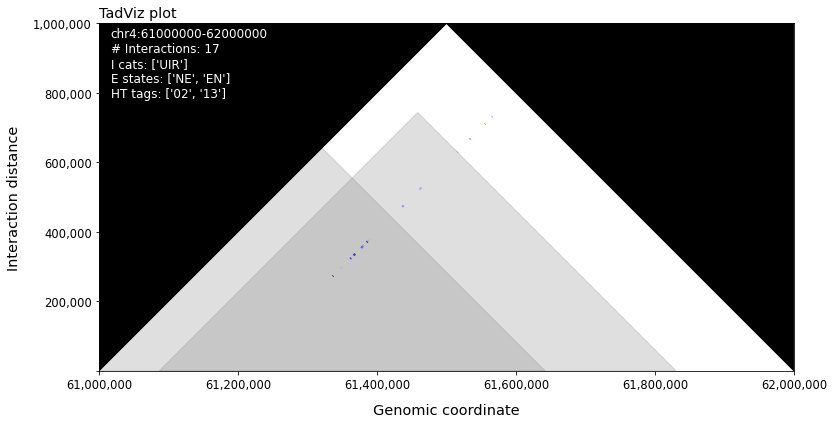

In [23]:
chrom = 'chr4'
from_pos = 60000000
to_pos = from_pos + 2500000
window_size = 1000000
shift_size = int(window_size/2)
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
    for ht_tag_list in [['03', '12'], ['02', '13']]:
        print("\tht_tags: " + str(ht_tag_list))
        for i_cat in ['DI', 'UIR']:
            print("\t\ti_cat: " + i_cat)
            TadViz_plot = visualizer.create_visualization(chrom = chrom,
                                            begin = begin,
                                            end = end,
                                            inter_cat_list = [i_cat],
                                            enr_cat_list = ['NE', 'EN'],
                                            ht_tag_list = ht_tag_list,
                                            color_i_cats=False,
                                            verbose=False)

### Possible plots for publication

[INFO] Creating visualization ...
	[INFO] Extracted a total number of 4,370 interactions in range:
		chr10:12500000-14500000
	[INFO] Filter for interactions to be visualized:
		[INFO] Interaction categories:
			['DI']
		[INFO] Enrichment status:
			['NE', 'EN']
		[INFO] HT tag:
			['01', '02', '03', '12', '13', '23']
		[INFO] Number interactions:
			1,685
	[INFO] Read pair count quantiles of interactions to be visualized:
		[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
		[ 10.  12.  14.  17.  21.  27.  34.  48.  72. 694.]
[INFO] ... done.


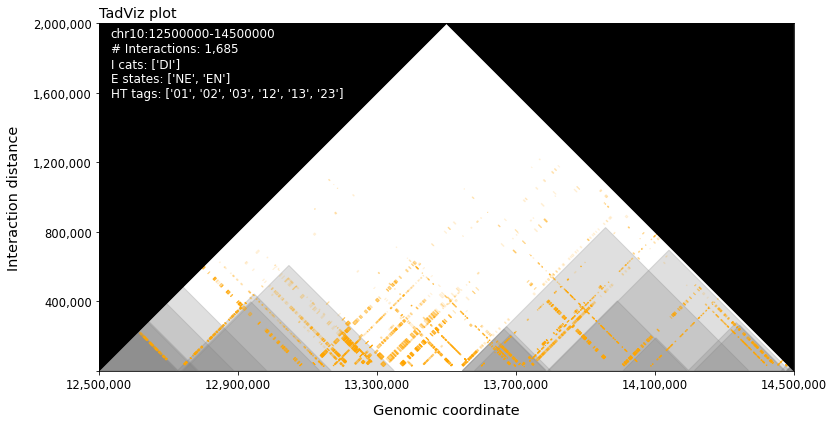

In [33]:
chrom = 'chr10'
begin = 12500000
end = begin + 2000000

x=visualizer.create_visualization(chrom = chrom,
                                begin = begin,
                                end = end,
                                inter_cat_list = ['DI'],
                                enr_cat_list = ['NE','EN'],
                                color_i_cats = True)